In [7]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

# Data generation

The function below will generate the data points and requires these inputs:

    centroidLocation: Coordinates of the centroids that will generate the random data.
        Example: input: [[4,3], [2,-1], [-1,4]]
    numSamples: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)
        Example: 1500
    clusterDeviation: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters.
        Example: 0.5



In [3]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y


In [5]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

# Modeling

In [9]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 2, ..., 2, 2, 1], shape=(1500,))

# Distinguish outliers

In [13]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True], shape=(1500,))

In [14]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [15]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

# Data visualization

In [16]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

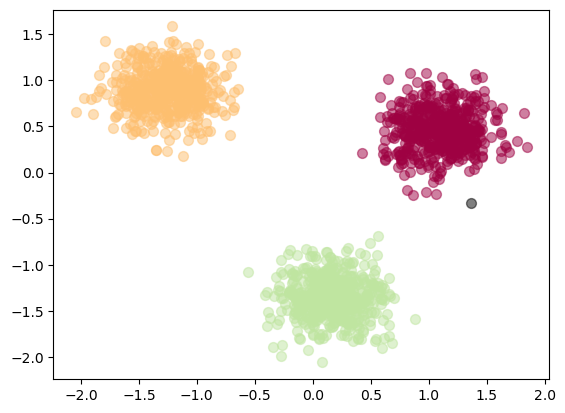

In [17]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

In [18]:
!curl -O weather-stations20140101-20141231.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: weather-stations20140101-20141231.csv
WABUSH A,52.923,-66.865,NL,-27.7,0,NA,-13.6,0,-46.8,0,,,NA,5.1,0,NA,,2,,,NA,1279.9,0,85041775028000000038516,11,,,NA,729.4,0,8201780

#  Load the dataset

In [20]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


# Cleaning

In [21]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


# Visualization

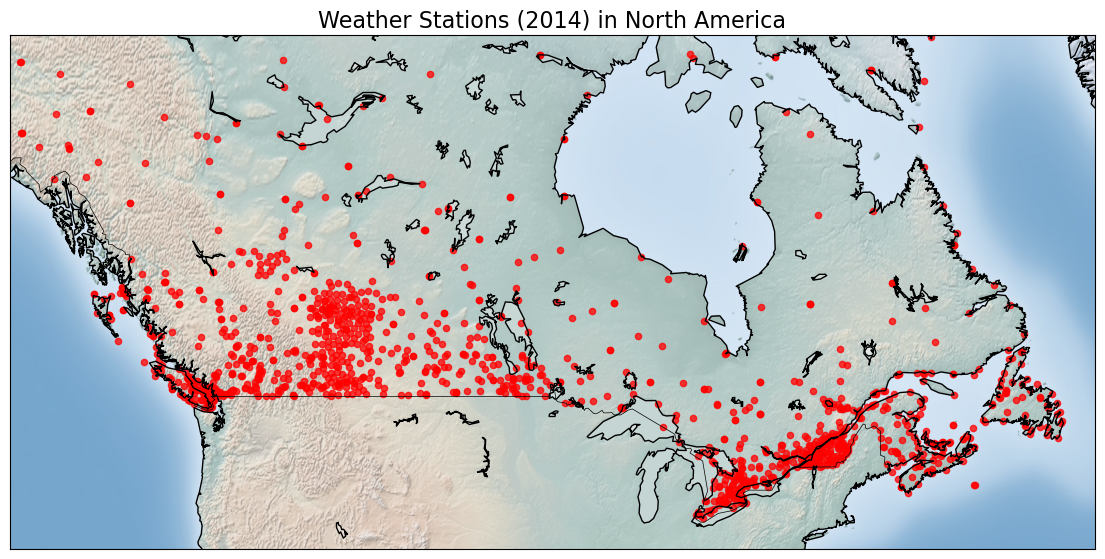

In [23]:
# Import required libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import numpy as np

# For Jupyter notebook
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# ===============================
# Example: load your dataset
# ===============================
filename = 'weather-stations20140101-20141231.csv'
pdf = pd.read_csv(filename)

# Make sure longitude and latitude are floats
pdf['Long'] = pdf['Long'].astype(float)
pdf['Lat'] = pdf['Lat'].astype(float)

# ===============================
# Define map boundaries
# ===============================
llon, ulon = -140, -50  # min/max longitude
llat, ulat = 40, 65     # min/max latitude

# Filter data within boundaries
pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) &
          (pdf['Lat'] > llat) & (pdf['Lat'] < ulat)]

# ===============================
# Create Basemap
# ===============================
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# ===============================
# Convert coordinates to map projection
# ===============================
xs, ys = my_map(pdf['Long'].values, pdf['Lat'].values)
pdf['xm'], pdf['ym'] = xs, ys

# ===============================
# Plot all weather stations
# ===============================
my_map.scatter(pdf['xm'], pdf['ym'], s=20, c='red', alpha=0.75)

plt.title('Weather Stations (2014) in North America', fontsize=16)
plt.show()


In [24]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

#  Visualization of clusters based on location

Cluster 0, Avg Temp: -10.42
Cluster 1, Avg Temp: -19.90
Cluster 2, Avg Temp: 3.80


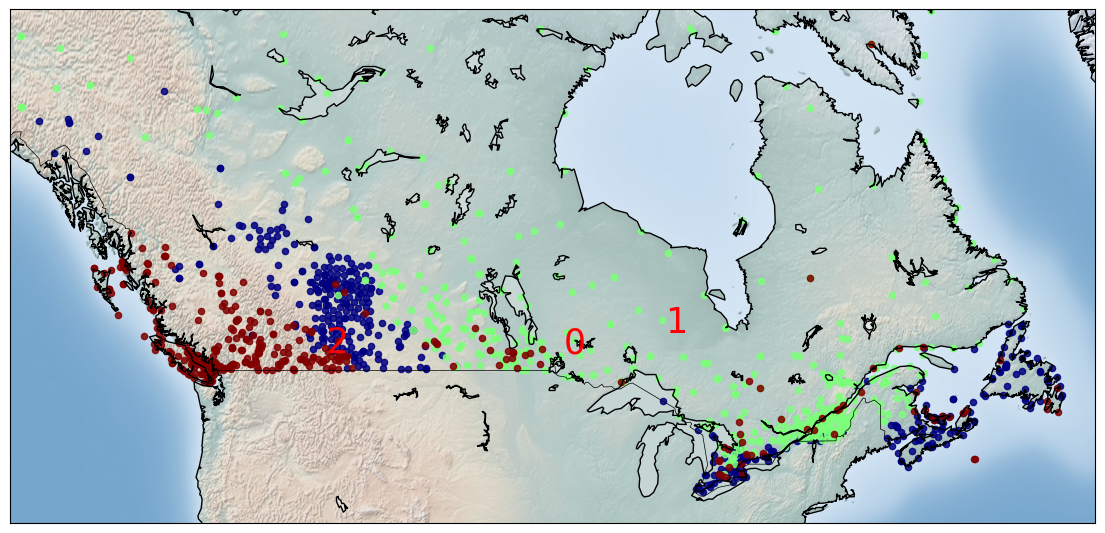

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans

%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# --------------------------
# Load your dataset
# --------------------------
filename = 'weather-stations20140101-20141231.csv'
pdf = pd.read_csv(filename)

# --------------------------
# Define the subset of data for mapping
# --------------------------
llon, ulon = -140, -50
llat, ulat = 40, 65

# Keep original indices for later
pdf_map = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) &
              (pdf['Lat'] > llat) & (pdf['Lat'] < ulat)].copy()

# --------------------------
# Prepare features for clustering (example: Temperature)
# --------------------------
# Make sure to select columns that exist in your dataset
# Here I'm assuming you have 'Tm' column for temperature
X = pdf_map[['Tm']].fillna(0).values  # replace NaN with 0

# --------------------------
# Apply KMeans
# --------------------------
clusterNum = 3
kmeans = KMeans(n_clusters=clusterNum, random_state=42)
labels = kmeans.fit_predict(X)

# Add labels to the filtered dataframe
pdf_map['Clus_Db'] = labels

# --------------------------
# Create map
# --------------------------
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# Convert longitude/latitude to map coordinates
xs, ys = my_map(np.asarray(pdf_map.Long), np.asarray(pdf_map.Lat))
pdf_map['xm'] = xs
pdf_map['ym'] = ys

# --------------------------
# Visualization
# --------------------------
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    # Use gray for noise (-1), otherwise assign a cluster color
    c = ([0.4, 0.4, 0.4] if clust_number == -1 else colors[int(clust_number)])
    
    # Select all points in this cluster
    clust_set = pdf_map[pdf_map.Clus_Db == clust_number]
    
    # Plot points
    my_map.scatter(clust_set.xm, clust_set.ym, color=c, marker='o', s=20, alpha=0.85)
    
    # Plot cluster centers
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=25, color='red')
        print(f"Cluster {clust_number}, Avg Temp: {np.mean(clust_set.Tm):.2f}")

plt.show()


## Clustering of stations based on their location, mean, max, and min Temperature

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap
import numpy as np

# --------------------------
# Filter the dataframe to the map region
# --------------------------
llon, ulon = -140, -50
llat, ulat = 40, 65

pdf_map = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) &
              (pdf['Lat'] > llat) & (pdf['Lat'] < ulat)].copy()

# --------------------------
# Create Basemap and convert lat/lon to map coordinates
# --------------------------
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

xs, ys = my_map(np.asarray(pdf_map.Long), np.asarray(pdf_map.Lat))
pdf_map['xm'] = xs
pdf_map['ym'] = ys

# --------------------------
# Prepare the dataset for DBSCAN
# --------------------------
# Replace NaNs with 0 or appropriate value
Clus_dataSet = pdf_map[['xm','ym','Tx','Tm','Tn']].fillna(0).values
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# --------------------------
# Compute DBSCAN
# --------------------------
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
labels = db.labels_

pdf_map["Clus_Db"] = labels
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

print("Number of clusters (excluding noise):", realClusterNum)
print(pdf_map[["Stn_Name","Tx","Tm","Clus_Db"]].head(5))


Number of clusters (excluding noise): 13
                 Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3        DISCOVERY ISLAND  12.5  NaN       -1
4     DUNCAN KELVIN CREEK  14.5  7.7        0


## Visualization of clusters based on location and Temperture

Cluster 0, Avg Temp: 6.184868421052631
Cluster 1, Avg Temp: nan
Cluster 2, Avg Temp: 6.84090909090909
Cluster 3, Avg Temp: -0.48888888888888893
Cluster 4, Avg Temp: -13.758636363636365
Cluster 5, Avg Temp: -4.249056603773585
Cluster 6, Avg Temp: nan
Cluster 7, Avg Temp: -16.349999999999998
Cluster 8, Avg Temp: nan
Cluster 9, Avg Temp: -13.424999999999999
Cluster 10, Avg Temp: nan
Cluster 11, Avg Temp: -9.753333333333334
Cluster 12, Avg Temp: -4.258333333333334


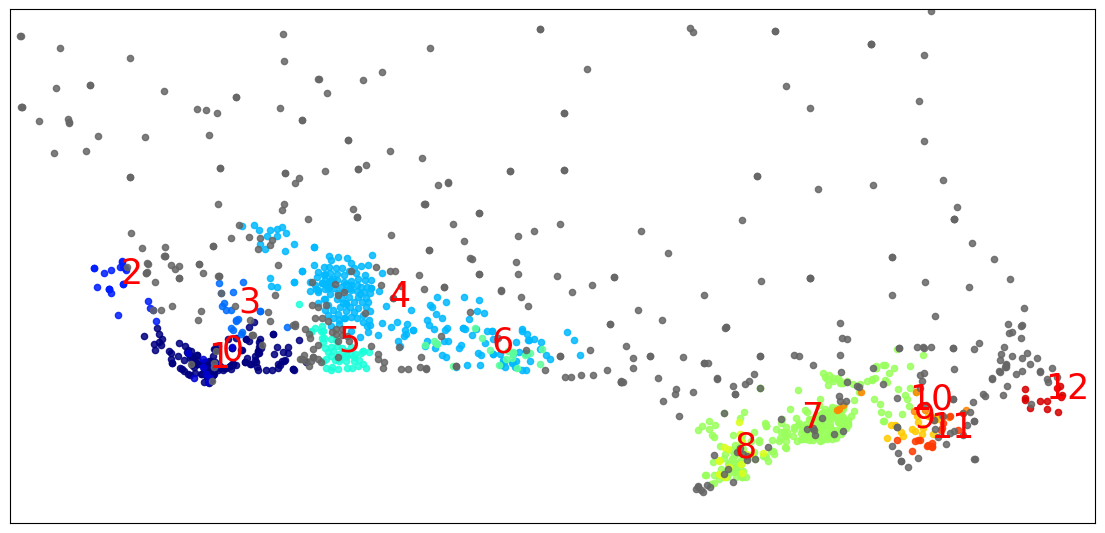

In [32]:
# Visualization of clusters based on location and Temperature
for clust_number in set(labels):
    # Use gray for noise (-1), otherwise assign a cluster color
    c = ([0.4,0.4,0.4] if clust_number == -1 else colors[int(clust_number)])
    
    # Select all points in this cluster
    clust_set = pdf_map[pdf_map.Clus_Db == clust_number]
    
    # Plot points
    my_map.scatter(clust_set.xm, clust_set.ym, color=c, marker='o', s=20, alpha=0.85)
    
    # Plot cluster number at the centroid
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=25, color='red')
        print(f"Cluster {clust_number}, Avg Temp: {np.mean(clust_set.Tm)}")
